#### importing packages

In [2]:
# data handling & visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data preprocessing
from sklearn.model_selection import train_test_split

# models & metrics
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor

#### combining csv files

In [3]:
wind_turbines = pd.concat(
    map(pd.read_csv, ['Location1.csv', 'Location2.csv', 'Location3.csv', 'Location4.csv']), ignore_index=True)

print(wind_turbines.dtypes, '\n')
print(wind_turbines.isnull().sum())

Time                    object
temperature_2m         float64
relativehumidity_2m      int64
dewpoint_2m            float64
windspeed_10m          float64
windspeed_100m         float64
winddirection_10m        int64
winddirection_100m       int64
windgusts_10m          float64
Power                  float64
dtype: object 

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64


moving on to <font size="4"> **feature selection** </font>, since there are no missing and categorical data

In [4]:
# dropping the Time column
wind_turbines.drop('Time', axis=1, inplace=True)

# setting the X & y sets
X = wind_turbines.drop('Power', axis=1)
y = wind_turbines['Power']

splitting the data set

In [5]:
#splitting training & testing data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.75, test_size=0.25,
                                                      random_state=0)

#### using Decision Trees

In [6]:
# initiating & fitting the model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [7]:
# prediction & metrics
dt_prediction = dt_model.predict(X_valid)

In [8]:
# calculating mean absolute error
dt_mae = mean_absolute_error(y_valid, dt_prediction)

# calculating root mean squared error
dt_rmse = root_mean_squared_error(y_valid, dt_prediction)

# calculating r2 & adjusted r2
dt_r2 = r2_score(y_valid, dt_prediction) * 100
dt_adj_r2 = abs(1 - (1-r2_score(y_valid, dt_prediction)) * (len(y_valid)-1)/(len(y_valid)-X_valid.shape[1]-1) * 100)

dt_scores = [[dt_mae, dt_rmse], [dt_r2, dt_adj_r2]]

#### using Random Forest

In [9]:
# initiating & fitting the model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
# prediction & metrics
rf_prediction = rf_model.predict(X_valid)

In [11]:
# calculating mean absolute error
rf_mae = mean_absolute_error(y_valid, rf_prediction)

# calculating root mean squared error
rf_rmse = root_mean_squared_error(y_valid, rf_prediction)

# calculating r2 & adjusted r2
rf_r2 = r2_score(y_valid, rf_prediction) * 100
rf_adj_r2 = abs(1 - (1-r2_score(y_valid, rf_prediction)) * (len(y_valid)-1)/(len(y_valid)-X_valid.shape[1]-1) * 100)

rf_scores = [[rf_mae, rf_rmse], [rf_r2, rf_adj_r2]]

#### using Linear Regression

In [12]:
# initiation & fitting the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [13]:
# prediction
lr_prediction = lr_model.predict(X_valid)

In [14]:
# calculating mean absolute error
lr_mae = mean_absolute_error(y_valid, lr_prediction)

# calculating root mean squared error
lr_rmse = root_mean_squared_error(y_valid, lr_prediction)

# calculating r2 & adjusted r2
lr_r2 = r2_score(y_valid, lr_prediction) * 100
lr_adj_r2 = abs(1 - (1-r2_score(y_valid, lr_prediction)) * (len(y_valid)-1)/(len(y_valid)-X_valid.shape[1]-1) * 100)

lr_scores = [[lr_mae, lr_rmse], [lr_r2, lr_adj_r2]]

#### using Gradient Boosting

In [15]:
# initiation & fitting the model
gb_model = HistGradientBoostingRegressor()
gb_model.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [16]:
# prediction
gb_prediction = gb_model.predict(X_valid)

In [17]:
# calculating mean absolute error
gb_mae = mean_absolute_error(y_valid, gb_prediction)

# calculating root mean squared error
gb_rmse = root_mean_squared_error(y_valid, gb_prediction)

# calculating r2 & adjusted r2
gb_r2 = r2_score(y_valid, gb_prediction) * 100
gb_adj_r2 = abs(1 - (1-r2_score(y_valid, gb_prediction)) * (len(y_valid)-1)/(len(y_valid)-X_valid.shape[1]-1) * 100)

gb_scores = [[gb_mae, gb_rmse], [gb_r2, gb_adj_r2]]

#### using XG Boost

In [18]:
# initiation & fittin the model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
# prediction
xgb_prediction = xgb_model.predict(X_valid)

In [20]:
# calculating mean absolute error
xgb_mae = mean_absolute_error(y_valid, xgb_prediction)

# calculating root mean squared error
xgb_rmse = root_mean_squared_error(y_valid, xgb_prediction)

# calculating r2 & adjusted r2
xgb_r2 = r2_score(y_valid, xgb_prediction) * 100
xgb_adj_r2 = abs(1 - (1-r2_score(y_valid, xgb_prediction)) * (len(y_valid)-1)/(len(y_valid)-X_valid.shape[1]-1) * 100)

xgb_scores = [[xgb_mae, xgb_rmse], [xgb_r2, xgb_adj_r2]]

#### visualisation & comparission of models

In [21]:
scores = [dt_scores, rf_scores, lr_scores, gb_scores, xgb_scores]

# creating a df of the mean errors
mean_errors = {
    'MEA': [_[0][0] for _ in scores],
    'RMSE': [_[0][1] for _ in scores],
}

mean_df = pd.DataFrame(mean_errors).transpose()
mean_df.columns = ['DecisionTree', 'RandomForest', 'LinearRegression', 'GradientBoosting', 'XG Boost']

# creating a df of the r2 scores
r2_scores = {
    'R2': [_[1][0] for _ in scores],
    'Adj R2': [_[1][1] for _ in scores]
}

r2_df = pd.DataFrame(r2_scores).transpose()
r2_df.columns = ['DecisionTree', 'RandomForest', 'LinearRegression', 'GradientBoosting', 'XG Boost']

In [22]:
print(mean_df, '\n')
print(r2_df)

      DecisionTree  RandomForest  LinearRegression  GradientBoosting  XG Boost
MEA       0.169559      0.124718          0.146947          0.131393  0.128942
RMSE      0.239294      0.166977          0.191556          0.174626  0.172384 

        DecisionTree  RandomForest  LinearRegression  GradientBoosting  \
R2         13.526575     57.895369         44.587171         53.949290   
Adj R2     85.489223     41.112323         54.422952         45.059123   

         XG Boost  
R2      55.124062  
Adj R2  43.884136  


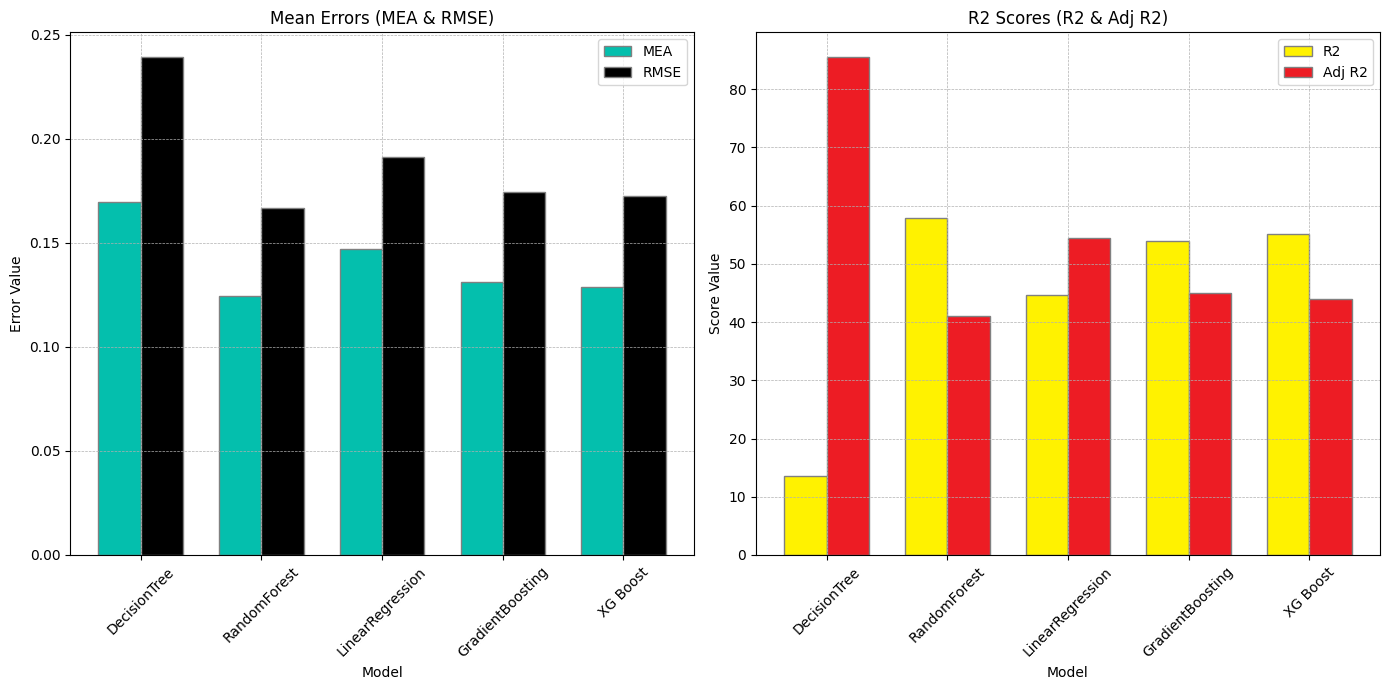

In [24]:
# Define bar width
bar_width = 0.35

# Get the positions for bars
mean_positions = np.arange(len(mean_df.columns))
r2_positions = np.arange(len(r2_df.columns))

# Create figure and subplots
plt.figure(figsize=(14, 7))

# Mean errors plot
plt.subplot(1, 2, 1)
plt.bar(mean_positions - bar_width/2, mean_df.loc['MEA'], bar_width, label='MEA', color='#04BFAD', edgecolor='grey')
plt.bar(mean_positions + bar_width/2, mean_df.loc['RMSE'], bar_width, label='RMSE', color='black', edgecolor='grey')
plt.xticks(mean_positions, mean_df.columns, rotation=45)
plt.xlabel('Model')
plt.ylabel('Error Value')
plt.title('Mean Errors (MEA & RMSE)')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# R2 scores plot
plt.subplot(1, 2, 2)
plt.bar(r2_positions - bar_width/2, r2_df.loc['R2'], bar_width, label='R2', color='#FFF200', edgecolor='grey')
plt.bar(r2_positions + bar_width/2, r2_df.loc['Adj R2'], bar_width, label='Adj R2', color='#ED1C24', edgecolor='grey')
plt.xticks(r2_positions, r2_df.columns, rotation=45)
plt.xlabel('Model')
plt.ylabel('Score Value')
plt.title('R2 Scores (R2 & Adj R2)')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()